# 1. Regresión lineal

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Generamos datos sintéticos
np.random.seed(0)
sample_size = 100
x = np.sort(5 * np.random.rand(sample_size, 1), axis=0)
y = 2 + 3 * x + np.random.randn(sample_size, 1)

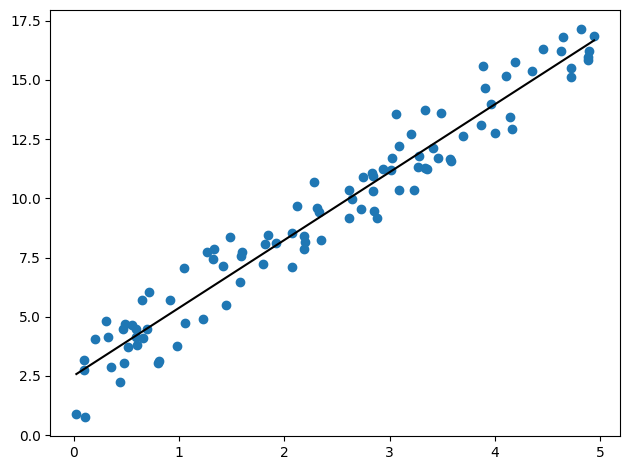

In [ ]:
from sklearn.linear_model import LinearRegression

# Ajustamos el modelo lineal
reg = LinearRegression().fit(x, y)

# Mostramos el modelo ajustado
plt.scatter(x, y)
plt.plot(x, reg.predict(x), color='black')
plt.tight_layout()
plt.show()

In [ ]:
# Mostramos los coficientes ajustados
print(f"Coeficientes: {reg.coef_[0]}")
print(f"Intercept: {reg.intercept_[0]}")

Coeficientes: [2.8656076]
Intercept: 2.5100338300357095


# 2. Regresión Polinómica

In [ ]:
from scipy.stats import pearsonr

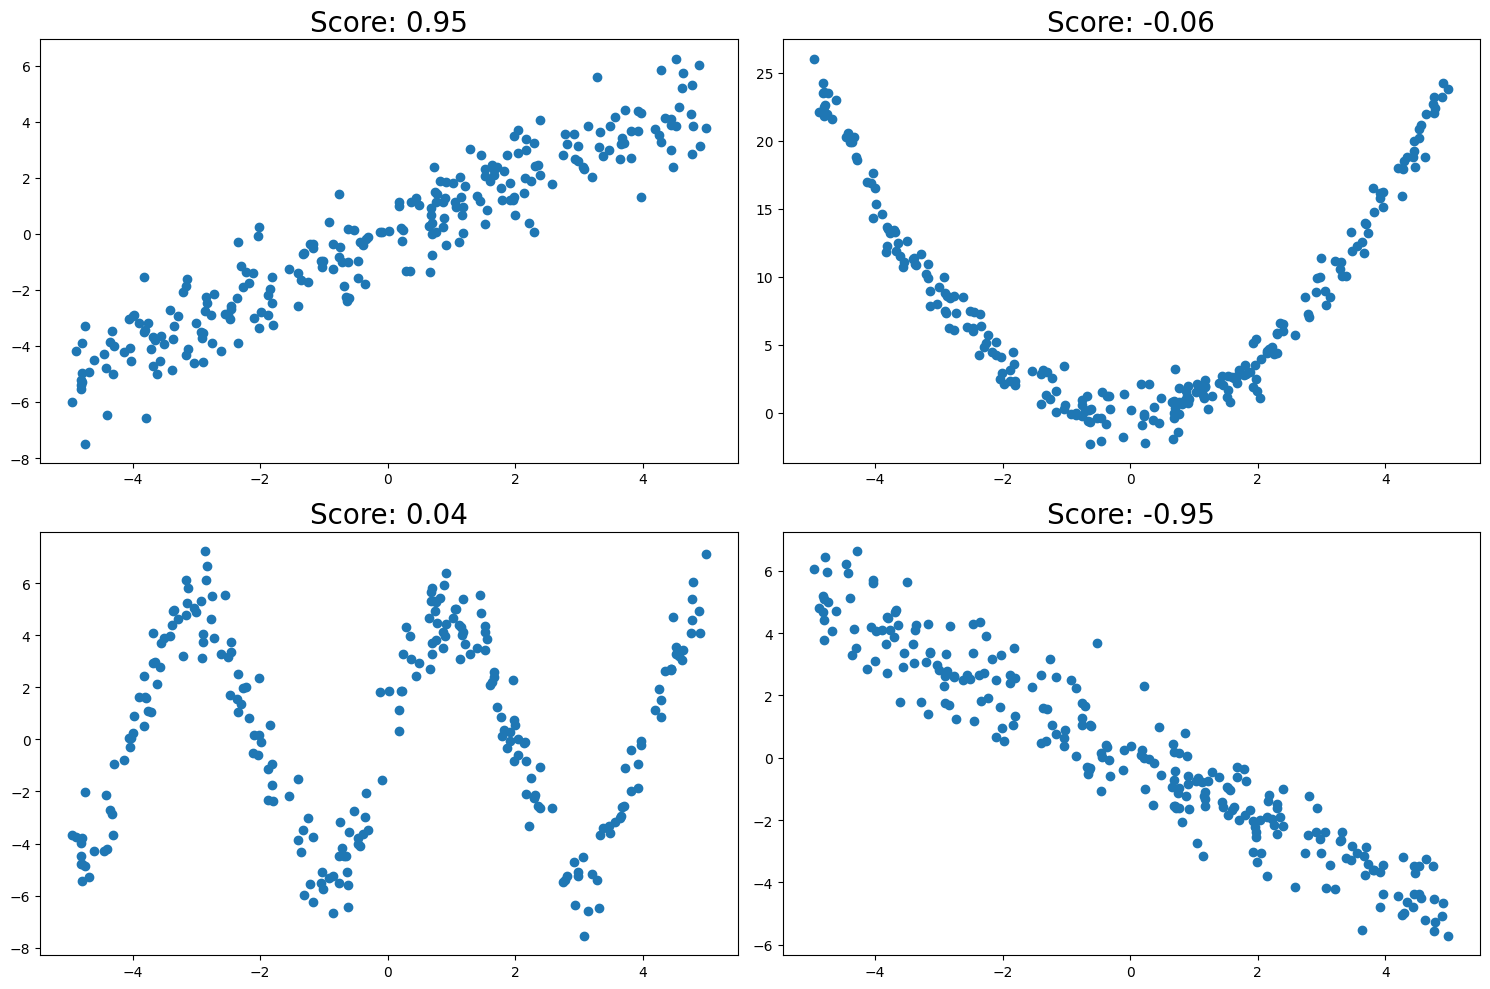

In [ ]:
np.random.seed(0)
sample_size = 250

# Generamos las variables a analizar
x = np.random.uniform(-5, 5, sample_size)
y1 = x + np.random.normal(0, 1, sample_size)
y2 = x**2 + np.random.normal(0, 1, sample_size)
y3 = 5 * np.sin(0.5 * np.pi * x) + np.random.normal(0, 1, sample_size)
y4 = -1*x + np.random.normal(0, 1, sample_size)

# Calculamos los coeficientes de correlación de Pearson
p_1 = pearsonr(y1, x)[0]
p_2 = pearsonr(y2, x)[0]
p_3 = pearsonr(y3, x)[0]
p_4 = pearsonr(y4, x)[0]

# Mostramos las gráficas junto con los coeficientes
fig, ax = plt.subplots(2,2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)
ax[0,0].scatter(x, y1)
ax[0,0].set_title("Score: {:.2f}".format(p_1), fontsize=20)
ax[0,1].scatter(x, y2)
ax[0,1].set_title("Score: {:.2f}".format(p_2), fontsize=20)
ax[1,0].scatter(x, y3)
ax[1,0].set_title("Score: {:.2f}".format(p_3), fontsize=20)
ax[1,1].scatter(x, y4)
ax[1,1].set_title("Score: {:.2f}".format(p_4), fontsize=20)
plt.tight_layout()
plt.show()


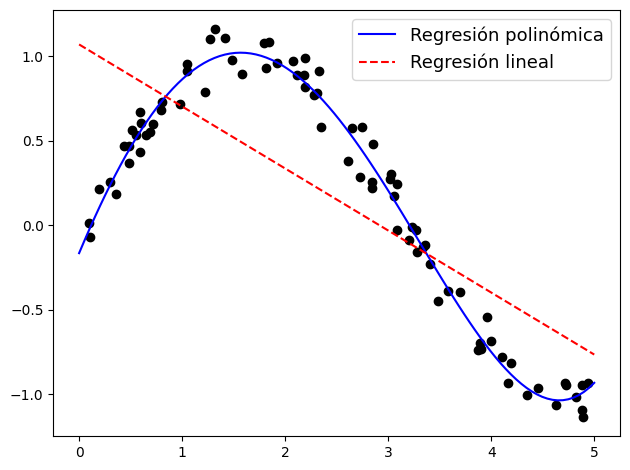

In [ ]:
np.random.seed(0)
sample_size = 80

x = np.sort(5 * np.random.rand(sample_size, 1), axis=0)
y = np.sin(x) + 0.1 * np.random.randn(sample_size, 1)

# Entrenamos una regresión lineal sin las variables polinómicas
reg_linear = LinearRegression().fit(x, y)

# Añadimos variables polinómicas a las variables predictoras
x_poly = np.hstack([x, x**2, x**3, x**4])

# Entrenmaos una regresión lineal con las variables polinómicas
reg_poly = LinearRegression().fit(x_poly, y)

# Mostramos los resultados
x_grid = np.linspace(0, 5, 100).reshape(-1, 1)
x_grid_poly = np.hstack([x_grid, x_grid**2, x_grid**3, x_grid**4])
plt.scatter(x, y, color='black')
plt.plot(x_grid, reg_poly.predict(x_grid_poly), linestyle = '-',  color='blue', label='Regresión polinómica')
plt.plot(x_grid, reg_linear.predict(x_grid), linestyle = '--', color='red', label='Regresión lineal')
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

# 3. Modelos lineales regularizados

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, \
MinMaxScaler

In [ ]:
np.random.seed(0)
sample_size = 1000
X = np.random.rand(sample_size, 5)
w = np.array([1, 0, 2, 0, 3])
y = np.dot(X, w) + np.random.normal(size=(sample_size,))

# Ajustamos los modelos
reg_linear = Pipeline([('scaler', StandardScaler()),
  ('model', LinearRegression())]).fit(X, y)
reg_ridge = Pipeline([('scaler', StandardScaler()),
  ('model', Ridge(alpha=100))]).fit(X, y)
reg_lasso = Pipeline([('scaler', StandardScaler()),
  ('model', Lasso(alpha=0.1))]).fit(X, y)
reg_elastic = Pipeline([('scaler', StandardScaler()),
  ('model', ElasticNet(alpha=0.1))]).fit(X, y)
  
# Creamos un dataframe para mostrar los coeficientes calculados por cada modelo
coef_df = pd.DataFrame({'variable': ['x1', 'x2', 'x3', 'x4',
                        'x5'],
                        'coef_linear': reg_linear['model'].coef_,
                        'coef_ridge': reg_ridge['model'].coef_,
                        'coef_lasso': reg_lasso['model'].coef_,
                        'coef_elastic': reg_elastic['model'].coef_
                        })
print(coef_df)

  variable  coef_linear  coef_ridge  coef_lasso  coef_elastic
0       x1     0.295166    0.264944    0.189243      0.228405
1       x2    -0.038902   -0.033472   -0.000000     -0.000000
2       x3     0.559480    0.509018    0.460455      0.486018
3       x4    -0.009901   -0.006504   -0.000000     -0.000000
4       x5     0.850992    0.772444    0.745623      0.759323


In [ ]:
from sklearn.model_selection import train_test_split

# Separamos en train y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                 test_size=0.2, random_state=0)

In [ ]:

from sklearn.metrics import mean_absolute_error as mse

# Calculamos la medida de rendimiento sobre el conjunto de validación
reg_linear2 = LinearRegression().fit(X_train, y_train)

print(mse(y_val, reg_linear2.predict(X_val)))

0.8398308730276176


# 4. Clasificación

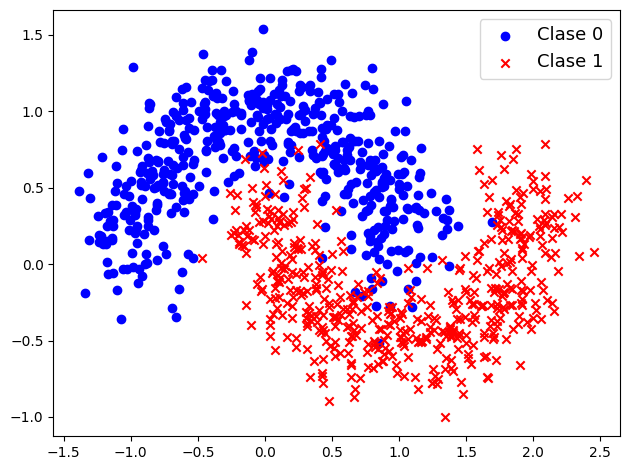

In [ ]:
from sklearn.datasets import make_moons

# Generamos los datos
sample_size = 1000
X, y = make_moons(n_samples=sample_size, noise=0.2, random_state=0)

# Los mostramos
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='o', label='Clase 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='x', label='Clase 1')
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

In [ ]:
# Función para mostrar nubes de puntos con dos clases
def show_2_classes(X,y):
  plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='o', label='Clase 0')
  plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='x', label='Clase 1')
  plt.legend(fontsize=13)
  plt.tight_layout()
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separamos en train y en validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

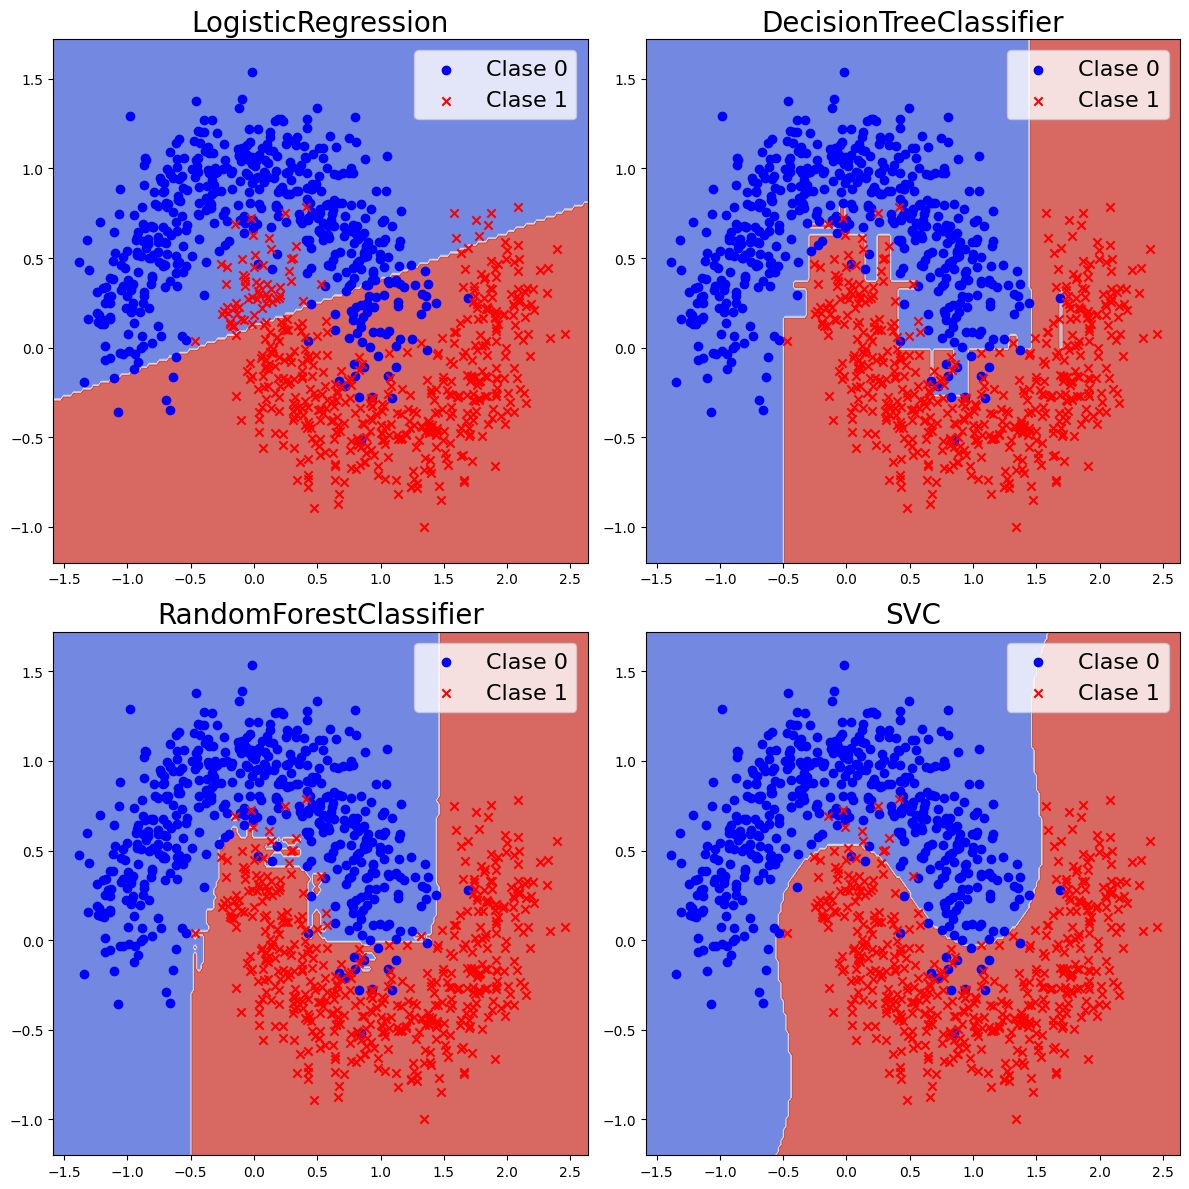

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Ajustamos una regresión logística
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])
log_reg.fit(X_train, y_train)

# Ajustamos un árbol de decisión
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Ajustamos un SVM con un kernel RBF
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf'))    
])
svm.fit(X_train, y_train)

# Ajustamos un random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# DIBUJAMOS LOS MODELOS
h = 0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

# Función para dibujar las fronteras de decisión
def plot_decision_boundary(model, ax, X, y, xx, yy):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='o',
               label='Clase 0')
    ax.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='x',
               label='Clase 1')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    model_name = model.__class__.__name__
    if model_name!='Pipeline':
      ax.set_title(model_name, fontsize=20)
    else:
      model_name = model['model'].__class__.__name__
      ax.set_title(model_name, fontsize=20)
    ax.legend(fontsize=16)

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
plot_decision_boundary(log_reg, ax[0,0], X, y, xx, yy)
plot_decision_boundary(dt, ax[0,1], X, y, xx, yy)
plot_decision_boundary(rf, ax[1,0], X, y, xx, yy)
plot_decision_boundary(svm, ax[1,1], X, y, xx, yy)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# log_reg
# Hacemos las predicciones en el conjunto de validación
y_pred = log_reg.predict(X_val)

# Calculamos la matriz de confusión
confusion = confusion_matrix(y_val, y_pred)

print("Confusion Matrix:")
print(confusion)

# Calculamos la precisión y sensibilidad
precision = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])
recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])

print("\nPrecision: {:.2f}".format(precision))
print("Sensibilidad: {:.2f}".format(recall))

Confusion Matrix:
[[121  24]
 [ 23 132]]

Precision: 0.85
Sensibilidad: 0.85


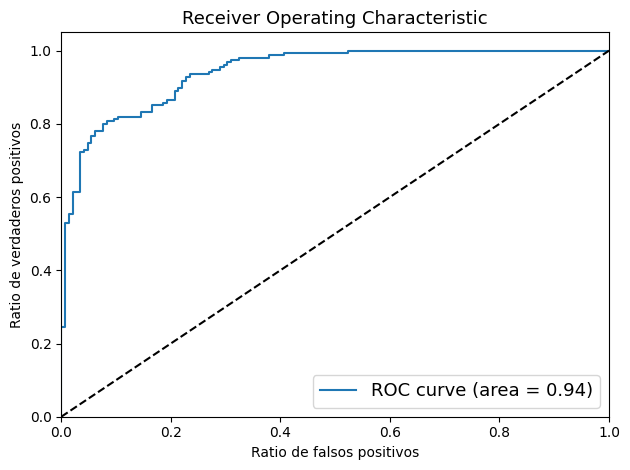

AUC: 0.94


In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculamos la curva ROC y el AUC (área bajo la curva)
fpr, tpr, thresholds = roc_curve(y_val, log_reg.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

# Dibujamos la curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # Modelo aleatorio
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de verdaderos positivos')
plt.title('Receiver Operating Characteristic', fontsize=13)
plt.legend(loc="lower right", fontsize=13)
plt.tight_layout()
plt.show()

print("AUC: {:.2f}".format(roc_auc))

In [ ]:
# Función para mostrar las medidas de rendimiento
def show_results(confusion):
  print("Confusion Matrix:")
  print(confusion)

  # Calculamos la precisión y sensibilidad
  precision = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])
  recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])

  print("\nPrecision: {:.2f}".format(precision))
  print("Sensibilidad: {:.2f}".format(recall))

In [ ]:
# Resultados para el modelo SVM
# Hacemos las predicciones en el conjunto de validación
y_pred = svm.predict(X_val)

# Medidas de rendimiento
confusion = confusion_matrix(y_val, y_pred)

show_results(confusion)

Confusion Matrix:
[[139   6]
 [  3 152]]

Precision: 0.96
Sensibilidad: 0.98


# 5. Croos validation

In [ ]:
from sklearn.datasets import make_classification

# Generamos los datos
X, y = make_classification(n_samples=1000, n_features=7, n_informative=5, n_redundant=
2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

# Separamos en entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Definimos la malla de parámetros
param_distributions = {
  'n_estimators': [10, 20, 50, 70, 100],
  'max_features': ['sqrt', 'log2', None],
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 4, 8, 10],
  'min_samples_leaf': [1, 2, 4],
  'bootstrap': [True, False]
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Realizamos la búsqueda con CV
rfc = RandomForestClassifier(random_state=42)
search = RandomizedSearchCV(rfc, param_distributions, n_iter=10, cv=5, random_state=42)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 70, 100]},
                   random_state=42)

In [ ]:
# Mostramos el mejor modelo
best_model = search.best_estimator_
best_params = search.best_params_
print(f'Best model: {best_model}')
print(f'Best hyperparameters: {best_params}')

Best model: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=4,
                       min_samples_split=4, n_estimators=20, random_state=42)
Best hyperparameters: {'n_estimators': 20, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


# 6. Datos desbalanceados

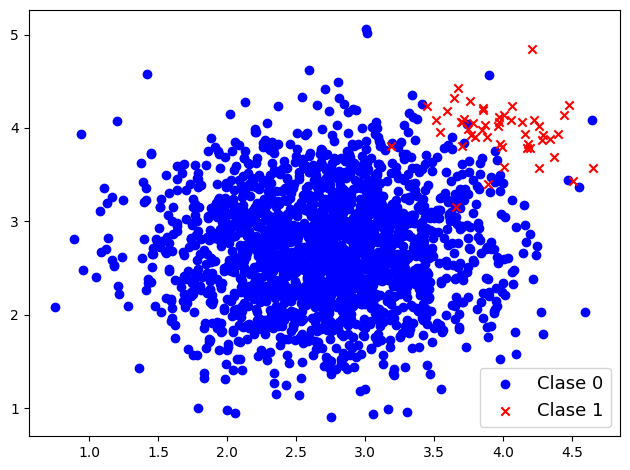

In [ ]:
from sklearn.datasets import make_blobs

# Conjunto de datos desbalanceado
X, y = make_blobs(n_samples = [2000, 50], 
                  centers=np.array([[2.7, 2.7], [4, 4]]), 
                  cluster_std = [0.6, 0.3] ,random_state=42)

# Dibujamos los datos
show_2_classes(X, y)

In [ ]:
# Separamos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

### SVM

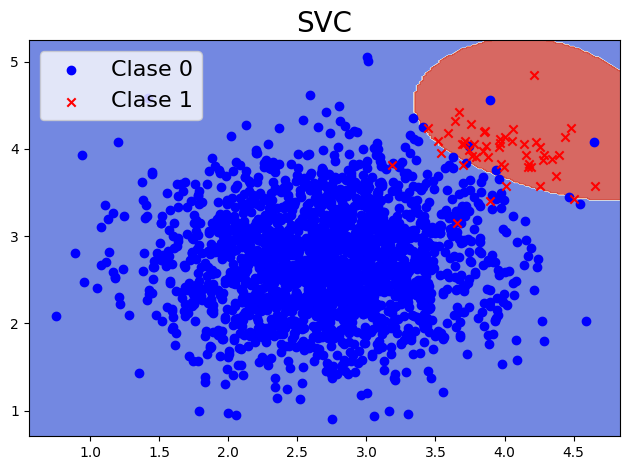

In [ ]:
# Ajustamos un SVM
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf'))    
])
svm.fit(X_train, y_train)

# Dibujamos el modelo
h = 0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots()
plot_decision_boundary(svm, ax, X, y, xx, yy)
plt.tight_layout()
plt.show()

In [ ]:
# Función para mostrar las gráficas de los modelos
def show_model(xx, yy):
  fig, ax = plt.subplots()
  plot_decision_boundary(svm, ax, X, y, xx, yy)
  plt.tight_layout()
  plt.show()

In [ ]:
# Predicciones en el conjunto de validación
y_pred = svm.predict(X_val)

# Medidas de rendimiento
confusion = confusion_matrix(y_val, y_pred)

show_results(confusion)

Confusion Matrix:
[[792   5]
 [  4  19]]

Precision: 0.79
Sensibilidad: 0.83


### SVM con pesos en las clases

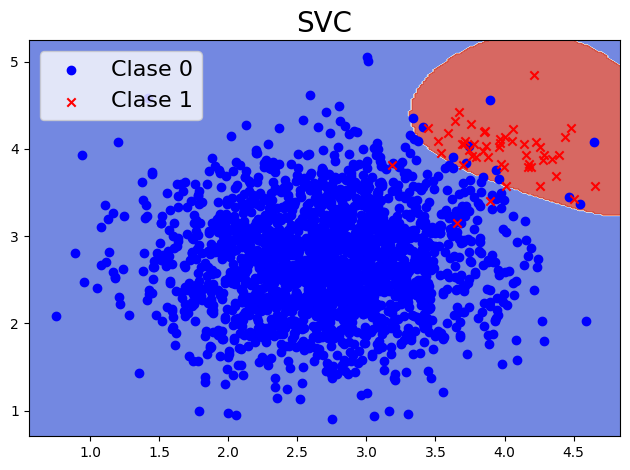

In [ ]:
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf', class_weight={0:.3, 1:.7}))    
])
svm.fit(X_train, y_train)

# Dibujamos el modelo
show_model(xx, yy)

In [ ]:
# Predicciones en el conjunto de validación
y_pred = svm.predict(X_val)

# Medidas de rendimiento
confusion = confusion_matrix(y_val, y_pred)

show_results(confusion)

Confusion Matrix:
[[790   7]
 [  3  20]]

Precision: 0.74
Sensibilidad: 0.87


### Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train,
                                            y_train)

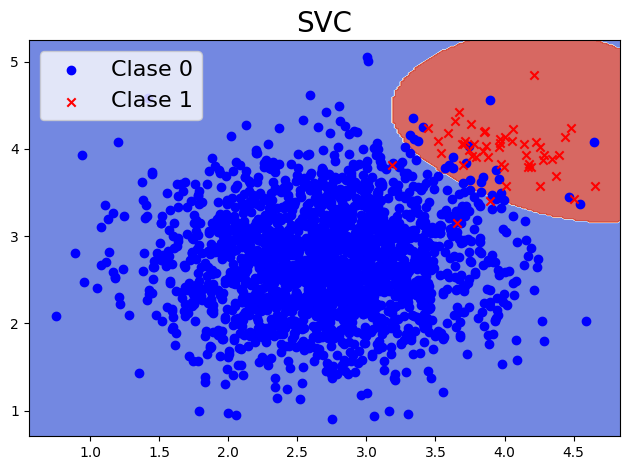

In [ ]:
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf'))    
])
svm.fit(X_resampled, y_resampled)

# Dibujamos los modelos
show_model(xx, yy)

In [ ]:
# Predicciones en el conjunto de validación
y_pred = svm.predict(X_val)

# Medidas de rendimiento
confusion = confusion_matrix(y_val, y_pred)

show_results(confusion)

Confusion Matrix:
[[785  12]
 [  3  20]]

Precision: 0.62
Sensibilidad: 0.87


### Unsersampling

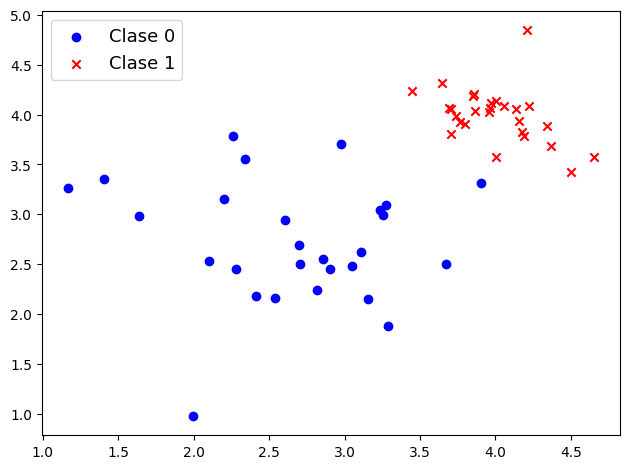

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicamos undersampling al conjunto de entrenamiento
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Gráfica con los datos de entramiento modificados
show_2_classes(X_resampled, y_resampled)

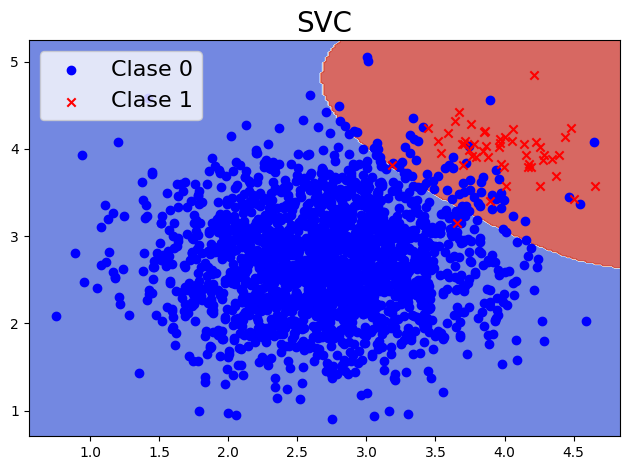

In [ ]:
# Ajustamos un SVM 
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf'))    
])
svm.fit(X_resampled, y_resampled)

# Dibujamos el modelo
show_model(xx, yy)

In [ ]:
# Predicciones en el conjunto de validación
y_pred = svm.predict(X_val)

# Medidas de rendimiento
confusion = confusion_matrix(y_val, y_pred)
show_results(confusion)

Confusion Matrix:
[[769  28]
 [  1  22]]

Precision: 0.44
Sensibilidad: 0.96


### SMOTE

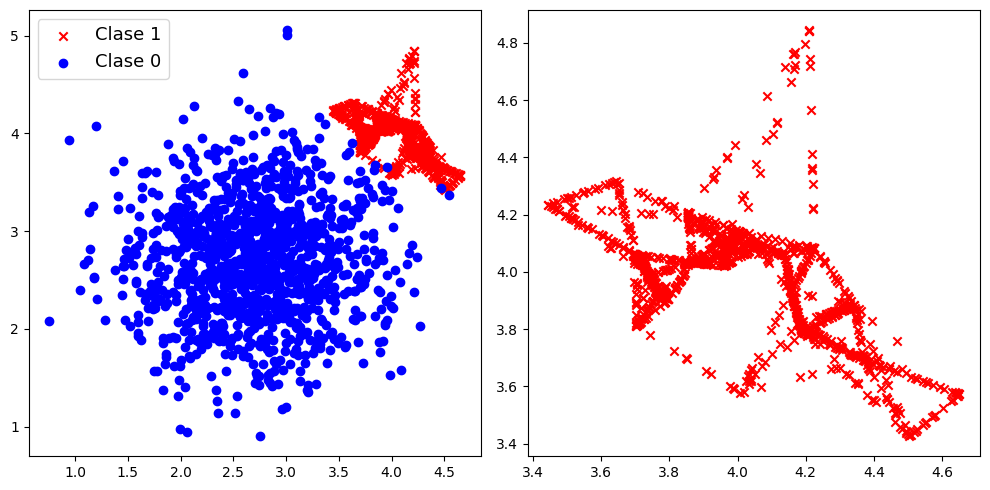

In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicamos SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# DIBUJAMOS LOS DATOS

# Función para dibujar los datos modificados y la clase minoritaria
def show_2_mod_classes(X_resampled, y_resampled):
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

  axs[0].scatter(X_resampled[y_resampled==1, 0], 
                X_resampled[y_resampled==1, 1], 
                c='red', marker='x', label='Clase 1')

  axs[0].scatter(X_resampled[y_resampled==0, 0],
                X_resampled[y_resampled==0, 1], 
                c='blue', marker='o', label='Clase 0')

  axs[1].scatter(X_resampled[y_resampled==1, 0], 
                X_resampled[y_resampled==1, 1], 
                c='red', marker='x')


  axs[0].legend(fontsize=13)
  plt.tight_layout()
  plt.show()

show_2_mod_classes(X_resampled, y_resampled)

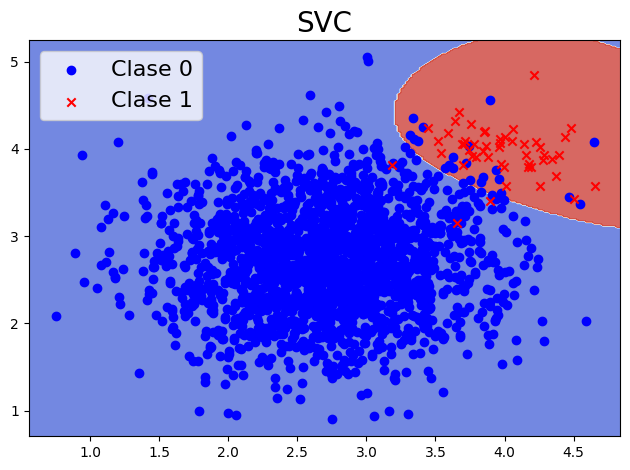

In [ ]:
# Ajustamos un SVM
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf'))    
])
svm.fit(X_resampled, y_resampled)

# Dinujamos el modelo
show_model(xx, yy)

In [ ]:
# Hacemos las predicciones en el conjunto de validación
y_pred = svm.predict(X_val)

# Calculamos la matriz de confusión
confusion = confusion_matrix(y_val, y_pred)
show_results(confusion)

Confusion Matrix:
[[786  11]
 [  3  20]]

Precision: 0.65
Sensibilidad: 0.87


### ADASYN

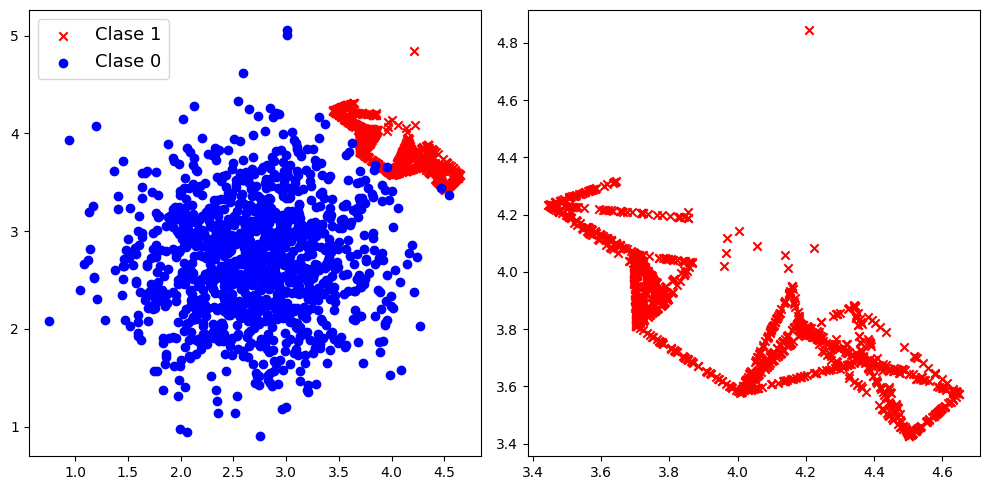

In [ ]:
from imblearn.over_sampling import ADASYN

# Aplicamos ADASYN
ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X_train, y_train)

# Dibujamos los datos
show_2_mod_classes(X_resampled, y_resampled)

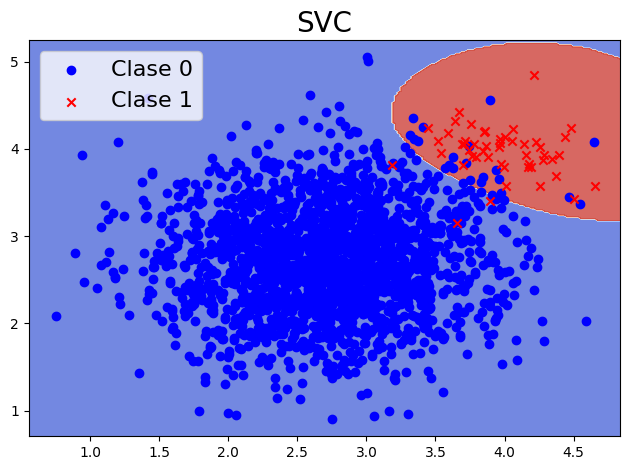

In [ ]:
# Ajustamos un SVM
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf'))    
])
svm.fit(X_resampled, y_resampled)

# Dibujamos el modelo
show_model(xx, yy)

In [ ]:
# Predicciones en el conjunto de validación
y_pred = svm.predict(X_val)

# Medidas de rendimiento
confusion = confusion_matrix(y_val, y_pred)
show_results(confusion)

Confusion Matrix:
[[786  11]
 [  3  20]]

Precision: 0.65
Sensibilidad: 0.87
